<a href="https://colab.research.google.com/github/nahid2553/Defence-Project/blob/main/Copy_of_PracticeUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
from google.colab import drive 
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [409]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/colab/trains.csv')
df.head()

,job,Study Hours College,Study Hours University,Social media and Gaming College,Social media and Gaming University,Sports on Field,Drug Addiction,Co Curriculum
0,0,3,2,0,1,1,0,1
1,0,3,2,0,2,1,0,1
2,0,3,2,2,5,0,0,0
3,1,2,3,4,2,1,0,1
4,0,5,2,2,4,0,0,0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   job                                 274 non-null    int64
 1   Study Hours College                 274 non-null    int64
 2   Study Hours University              274 non-null    int64
 3    Social media and Gaming College    274 non-null    int64
 4   Social media and Gaming University  274 non-null    int64
 5   Sports on Field                     274 non-null    int64
 6   Drug Addiction                      274 non-null    int64
 7   Co Curriculum                       274 non-null    int64
dtypes: int64(8)
memory usage: 17.2 KB


In [411]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [412]:
def bar_chart(feature):
  job=df[df['job']==1][feature].value_counts()
  jobless=df[df['job']==0][feature].value_counts()
  dff=pd.DataFrame([job,jobless])
  dff.index=['job','jobless']
  dff.plot(kind='bar',stacked=True,figsize=(10,5))

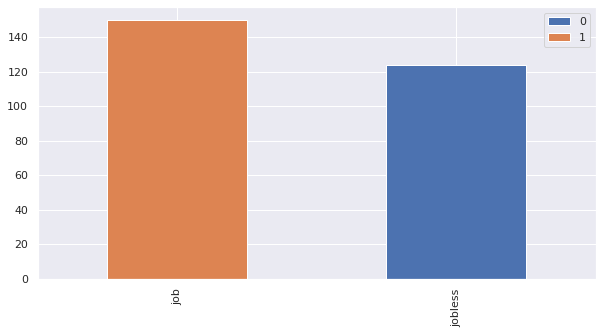

In [413]:
bar_chart('job')

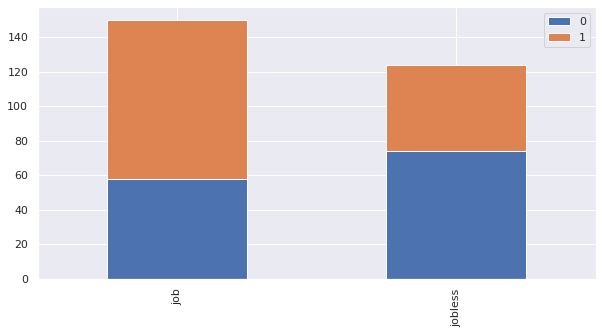

In [414]:
bar_chart('Co Curriculum')

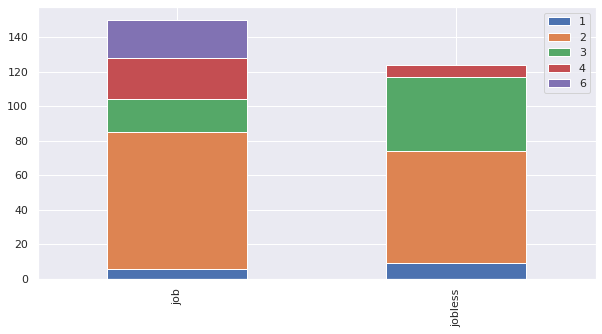

In [415]:
bar_chart('Study Hours University')

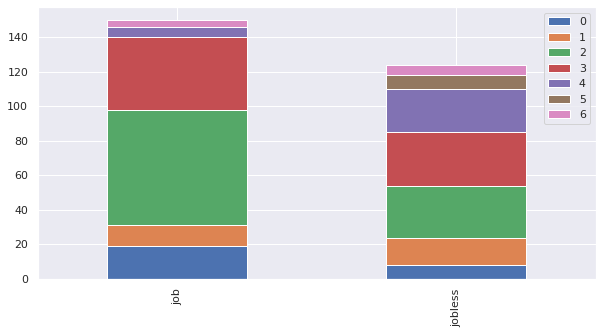

In [416]:
bar_chart('Social media and Gaming University')

**Target Vriable**

In [417]:
inputs = df.drop('job',axis='columns')

In [418]:
target = df['job']

In [419]:
target

0      0
1      0
2      0
3      1
4      0
      ..
269    1
270    1
271    1
272    1
273    1
Name: job, Length: 274, dtype: int64

In [420]:
inputs

,Study Hours College,Study Hours University,Social media and Gaming College,Social media and Gaming University,Sports on Field,Drug Addiction,Co Curriculum
0,3,2,0,1,1,0,1
1,3,2,0,2,1,0,1
2,3,2,2,5,0,0,0
3,2,3,4,2,1,0,1
4,5,2,2,4,0,0,0
...,...,...,...,...,...,...,...
269,3,2,0,2,1,0,1
270,6,3,2,2,0,0,0
271,4,2,1,2,0,0,1
272,7,6,0,0,1,0,1


**Lebel Encoding**

In [421]:
from sklearn.preprocessing import LabelEncoder
le_Co = LabelEncoder()

In [422]:
inputs['Co Curri_n'] = le_Co.fit_transform(inputs['Co Curriculum'])

In [423]:
inputs.head()

,Study Hours College,Study Hours University,Social media and Gaming College,Social media and Gaming University,Sports on Field,Drug Addiction,Co Curriculum,Co Curri_n
0,3,2,0,1,1,0,1,1
1,3,2,0,2,1,0,1,1
2,3,2,2,5,0,0,0,0
3,2,3,4,2,1,0,1,1
4,5,2,2,4,0,0,0,0


**`Dropping Columns and final input`**

In [424]:
inputs_n = inputs.drop(['Co Curriculum', 'Drug Addiction'],axis='columns')

In [425]:
inputs_n

,Study Hours College,Study Hours University,Social media and Gaming College,Social media and Gaming University,Sports on Field,Co Curri_n
0,3,2,0,1,1,1
1,3,2,0,2,1,1
2,3,2,2,5,0,0
3,2,3,4,2,1,1
4,5,2,2,4,0,0
...,...,...,...,...,...,...
269,3,2,0,2,1,1
270,6,3,2,2,0,0
271,4,2,1,2,0,1
272,7,6,0,0,1,1


In [426]:
X = df.drop('job',axis='columns')
y = df.job 

In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Decision Tree**

In [428]:
from sklearn import tree

In [429]:
model = tree.DecisionTreeClassifier()

In [430]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [431]:
model.score(inputs_n,target)

0.9562043795620438

In [432]:
model.predict([[  5,	4,	1,	5,	0, 1 ]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [433]:
from sklearn.tree import DecisionTreeClassifier
 
 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[19  6]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.83      1.00      0.91        30

    accuracy                           0.89        55
   macro avg       0.92      0.88      0.89        55
weighted avg       0.91      0.89      0.89        55



**Random Forest**

In [434]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [435]:
model.score(X_test, y_test)

0.8727272727272727

In [436]:
pred = model.predict(X_test)

In [437]:
pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [438]:
from sklearn.metrics import accuracy_score

In [439]:
accuracy_score(y_test,pred)

0.8727272727272727

In [440]:
from sklearn.metrics import confusion_matrix

In [441]:
confusion_matrix(y_test,pred)

array([[19,  6],
       [ 1, 29]])

In [442]:
from sklearn.metrics import classification_report

In [443]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.83      0.97      0.89        30

    accuracy                           0.87        55
   macro avg       0.89      0.86      0.87        55
weighted avg       0.88      0.87      0.87        55



**GussianNB**

In [444]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [445]:
model.fit(X_train,y_train)

GaussianNB()

In [446]:
model.score(X_test,y_test)

0.6727272727272727

In [447]:
pred = model.predict(X_test)

In [448]:
pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [449]:
from sklearn.metrics import accuracy_score

In [450]:
accuracy_score(y_test,pred)

0.6727272727272727

In [451]:
from sklearn.metrics import confusion_matrix

In [452]:
confusion_matrix(y_test,pred)

array([[18,  7],
       [11, 19]])

In [453]:
from sklearn.metrics import classification_report

In [454]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.62      0.72      0.67        25
           1       0.73      0.63      0.68        30

    accuracy                           0.67        55
   macro avg       0.68      0.68      0.67        55
weighted avg       0.68      0.67      0.67        55



In [455]:
from sklearn.tree import DecisionTreeClassifier
 
 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[19  6]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.83      1.00      0.91        30

    accuracy                           0.89        55
   macro avg       0.92      0.88      0.89        55
weighted avg       0.91      0.89      0.89        55

